In [1]:
from pathlib import Path
import pygimli as pg  # Stelle sicher, dass das Modul pg importiert ist und verfügbar ist
from pygimli.physics import ert
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np

from Hilfsfunktionen import T_corr_nach_Inversion
from Hilfsfunktionen import plotting_function

# Read data
base_dir = Path("filtered_data")
data = []
for unterordner in base_dir.iterdir():
    if unterordner.is_dir():
        datei_pfad = unterordner / "two_timesteps.ohm"
        if datei_pfad.exists():
            daten_objekt = pg.load(str(datei_pfad))
            data.append([unterordner.name, daten_objekt])
            print(f"Load data: {datei_pfad}")

# Create method manager
manager = []
for ts in data:
    manager.append(ert.ERTManager(ts[1], verbose=True))

# Create mesh
mesh = manager[0].createMesh(quality = 34, paraMaxCellSize=0.5, paraDepth=15)

# Inversion without temperature correction
results_tl_light = [] # list of inversion results
chi2_oT = []
chi2_wT = []
chi2 = []
lam = 100
for mgr,mgr_number in zip(manager, range(len(manager))):
    if mgr_number > 0:
        results_tl_light.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5,
                    paraDepth=15,lam=lam, dPhi= 0.1, startModel=results_tl_light[mgr_number-1], isReference = True))
        chi2.append(round(mgr.inv.chi2(),2))
    else:
        results_tl_light.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5, 
                                     dPhi= 0.1, paraDepth=15,lam=20)) 
        chi2.append(round(mgr.inv.chi2(),2))
    chi2_oT.append(chi2)
    
# Temperature correction
results_tl_light_corr = [] 
temp_spread = []
timestep = 0
ort = 'Langer-Kamp'
mesh2 = manager[0].mesh.createSubMesh(manager[0].mesh.cells(manager[0].mesh.cellMarkers() == 2))
for count, m in enumerate(results_tl_light):
    timestep = count + 11
    dateien = os.listdir(".\Temperature_data/" + ort )
    
    for datei in dateien: 
        if (datei).startswith('T_Profil%s_array' % (str(timestep))):
            Temp_tiefe_vektor = np.load(".\Temperature_data/" + ort + '/' + datei, allow_pickle=True)
    res_new,Tem_new = T_corr_nach_Inversion(m, mesh2, Temp_tiefe_vektor)
    results_tl_light_corr.append(res_new) # Reference inversion
    temp_spread.append(Tem_new)

for resu, resu_corr, man, wen in zip(results_tl_light,results_tl_light_corr,manager, data):
    response = man.inv.fop.response(resu) # response of real data 
    response_t_corr = man.inv.fop.response(resu_corr) # response of corrected data
    difference = response_t_corr - response
    wen[1]['rhoa'] = wen[1]['rhoa'] + difference # correct raw data for the difference 

# Inversion with temperature correction
results_tl_light_Tcorr = []
chi2 = []
lam = 100
for mgr,mgr_number in zip(manager, range(len(manager))):
    if mgr_number > 0:
        results_tl_light_Tcorr.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5,
                    paraDepth=15,lam=lam, dPhi= 0.1, startModel=results_tl_light_Tcorr[mgr_number-1], isReference = True))
        chi2.append(round(mgr.inv.chi2(),2))
    else:
        results_tl_light_Tcorr.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5, 
                                     dPhi= 0.1, paraDepth=15,lam=20)) 
        chi2.append(round(mgr.inv.chi2(),2))
    chi2_wT.append(chi2)


[NbConvertApp] Converting notebook Hilfsfunktionen.ipynb to script
[NbConvertApp] Writing 24885 bytes to Hilfsfunktionen.py


Load data: filtered_data\240610\two_timesteps.ohm
Load data: filtered_data\240704\two_timesteps.ohm


24/04/25 - 20:05:47 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 20:05:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 20:05:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 20:05:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 20:05:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 20:05:48 - pyGIMLi - INFO - Use median(data values)=107.75
24/04/25 - 20:05:48 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=107.750000/107.750000
24/04/25 - 20:05:48 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027021A4A2F0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027021A4A570>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000027021A4A430>
min/max (data): 23.04/1126
min/max (error): 10%/10.04%
min/max (start model): 108/108
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   79.64
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   15.01 (dPhi = 76.24%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.29 (dPhi = 37.50%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.84 (dPhi = 1.85%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    6.84 (dPhi = 0.03%) lam: 20.0
##############

24/04/25 - 20:07:23 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 20:07:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 20:07:23 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 20:07:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 20:07:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 20:07:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 20:07:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 20:07:24 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 20:07:24 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027021A4A700>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027021A4A9D0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000027021A4A840>
min/max (data): 21.96/1033
min/max (error): 10%/10.05%
min/max (start model): 15.08/2306
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    8.70
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.40 (dPhi = 18.69%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.41 (dPhi = 0.12%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.41 (dPhi = 0.00%) lam: 100.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 0.1%)  

24/04/25 - 20:09:00 - pyGIMLi - INFO - Use median(data values)=81.96688038924434
24/04/25 - 20:09:00 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=81.966880/81.966880
24/04/25 - 20:09:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027021A4A2F0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027021A4A570>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000027021A4A430>
min/max (data): 9.68/1086
min/max (error): 10%/10.04%
min/max (start model): 81.97/81.97
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   97.98
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   21.23 (dPhi = 73.81%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   11.39 (dPhi = 35.05%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   10.75 (dPhi = 1.86%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

24/04/25 - 20:10:35 - pyGIMLi - INFO - Starting inversion.


chi² =   10.74 (dPhi = 0.05%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.05 (< 0.1%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027021A4A700>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027021A4A9D0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000027021A4A840>
min/max (data): 12.92/894
min/max (error): 10%/10.05%
min/max (start model): 8.13/2283


24/04/25 - 20:10:35 - pyGIMLi - INFO - Setting starting model as reference!


--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   11.65
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    9.41 (dPhi = 13.04%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.43 (dPhi = 0.11%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    9.43 (dPhi = 0.00%) lam: 100.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 0.1%)                 #
################################################################################


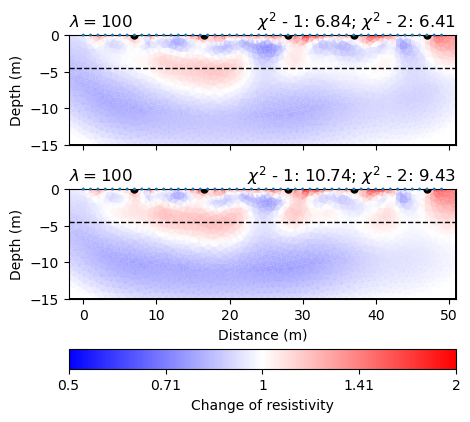

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,6))
axs = axs.flatten()
plt.subplots_adjust(hspace=-0.5)
for nr, chi2, m, name in zip([0,1],[chi2_oT, chi2_wT], [results_tl_light, results_tl_light_Tcorr], ['withoutTcorr', 'withTcorr']):
    ratio = m[1] / m[0]
    bild2 = manager[0].showResult(model= ratio,coverage = manager[0].coverage(),
            cMin=1/2, cMax=2, cMap= 'bwr', ax= axs[nr], label = 'Change of resistivity', logScale= True)
    if nr < 1:
        cb = bild2[-1]
        cb.remove() 
        axs[nr].xaxis.set_ticklabels([])  # Unterdrückt die x-Achse Labels
    if nr == 1:
        axs[nr].set_xlabel('Distance (m)')
    axs[nr].set_ylabel('Depth (m)')    
    axs[nr].set_title('$\chi^2$ - 1: '+ str(chi2[0][0]) + '; $\chi^2$ - 2: ' + str(chi2[0][1]), loc = 'right')
    axs[nr].set_title('$\lambda = $'+ str(100), loc = 'left')
    tree_postions = [7, 16.5, 28, 37, 47]
    for x in tree_postions:
        axs[nr].plot(x, 0, '.', markersize=10, color='black')
    axs[nr].set_ylim(-15, 0)
    axs[nr].axhline(y=-4.5, color='k', linewidth = 1,linestyle='--')

fig.savefig('./Fig11/Ref_inversion.png', bbox_inches = 'tight', dpi=300)